In [83]:
# Import important packages
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor 
# Importing KNN module from PyOD
from pyod.models.knn import KNN 
from pyod.models.ocsvm import OCSVM 
# Import the utility function for model evaluation
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.preprocessing import StandardScaler
from cf_matrix import make_confusion_matrix 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

# set seed
np.random.seed(123)

In [30]:
# Load the dataset from csv file by using pandas
data = pd.read_csv("creditcard.csv")

In [31]:
# show columns 
data.columns 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [32]:
# print the shape of the data
data.shape 

(284807, 31)

We have 284807 rows and 31 variables 

In [33]:
# show the first five rows 
data.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
# show description of the data 
data.describe() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [35]:
#check missing data 
data.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We dont have any missing data 

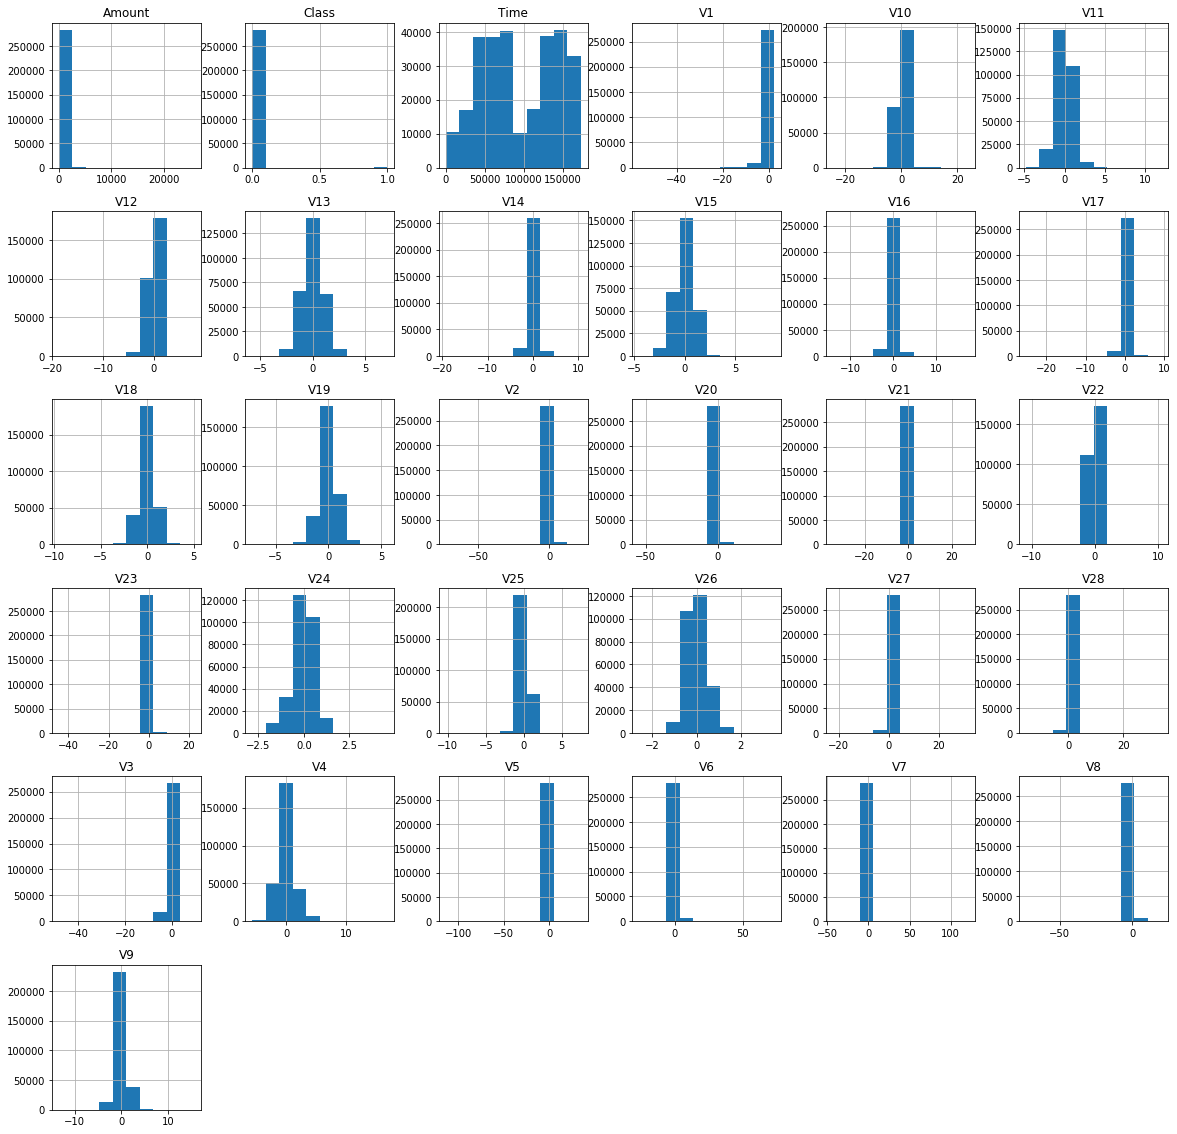

In [36]:
# draw histogram of each parameters 
data.hist(figsize=(20,20)) 
plt.show() 

Most of the Vs variable are clustered around 0 

In [37]:
# determine number of fraud cases in our  file
data.Class.value_counts(normalize=True)  

0    0.998273
1    0.001727
Name: Class, dtype: float64

99.83% of our data are valid transcation and only 0.17% are fraud transcation 

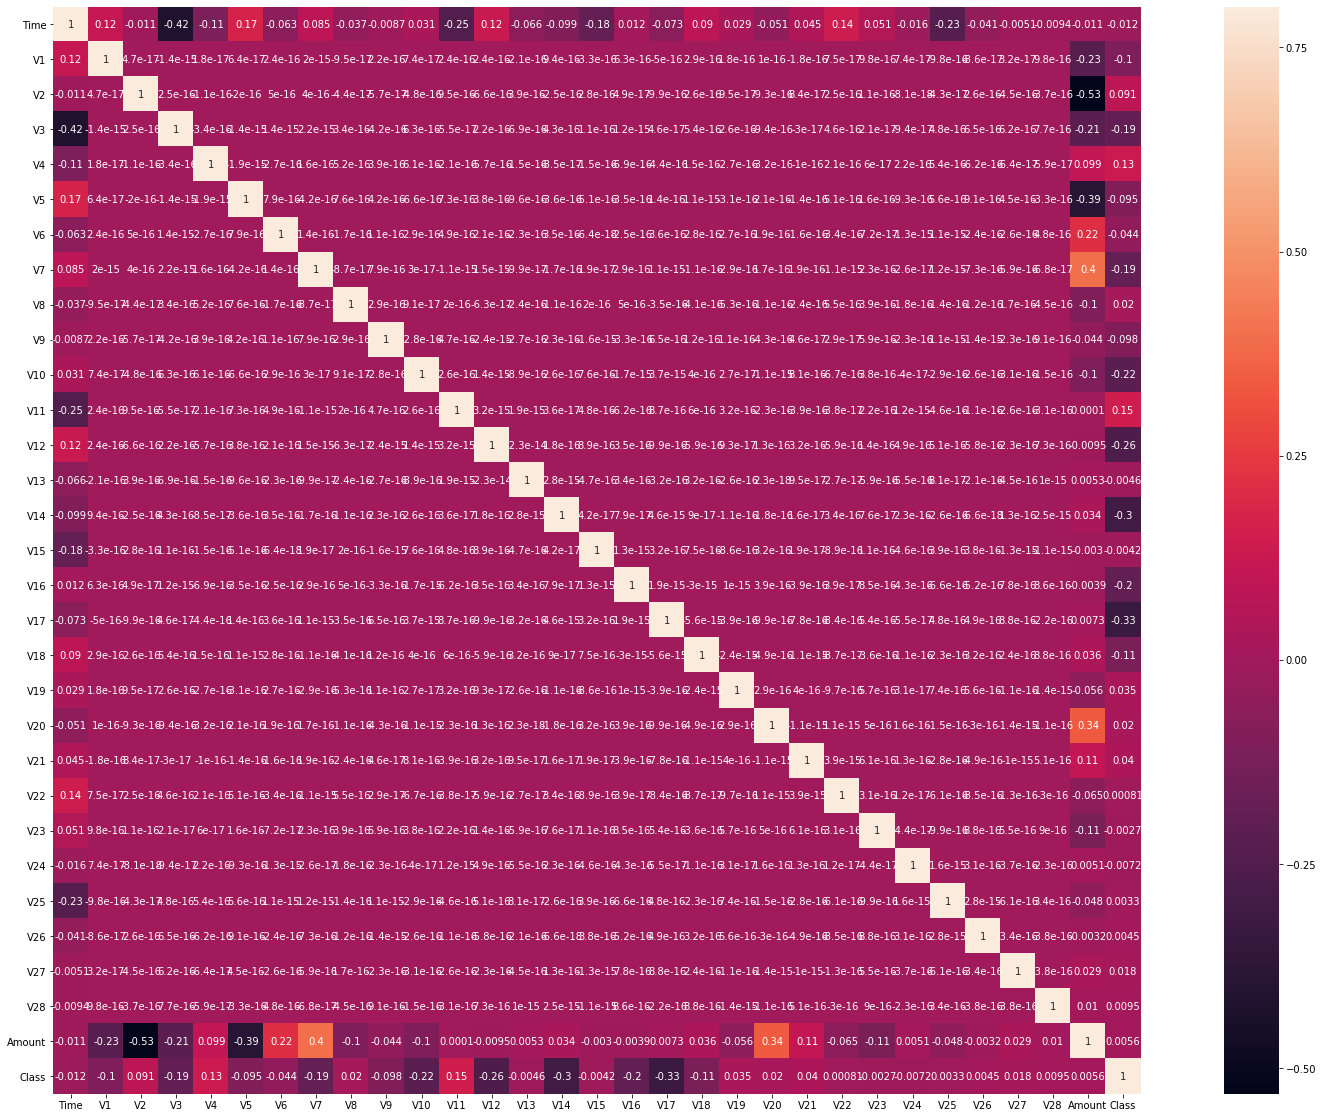

In [38]:
#find the correlation betweeen the variables 

corr = data.corr() 

fig = plt.figure(figsize=(30,20))

sns.heatmap(corr, vmax=.8, square=True,annot=True)    

**V11 variable** has strong positive correlation to **Class varible** while **V17 variable** have strong negative correlation to **Class varible**

In [64]:
# use sample of the dataset 

positive = data[data["Class"]== 1]
negative = data[data["Class"]== 0]


print("positive:{}".format(len(positive)))
print("negative:{}".format(len(negative)))

new_data = pd.concat([positive,negative[:10000]])

#shuffling our dataset 
new_data = new_data.sample(frac=1,random_state=42)


new_data.shape


positive:492
negative:284315


(10492, 31)

In [65]:
#Normalising the amount column.
new_data['Amount'] = StandardScaler().fit_transform(new_data['Amount'].values.reshape(-1,1))

In [66]:
# split into independent variables and target variable 
X = new_data.drop(['Time','Class'], axis=1)
y = new_data['Class']

# show the shape of x and y 
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape)) 

X shape: (10492, 29)
y shape: (10492,)


In [69]:
#split the data into train and test 

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=42 )

If you are learning about outlier detection, PyOD is simple toolkit which has a Scikit-learn style API, includes numerous detection algorithm implementations (it's GitHub repo has links to the original papers of the algorithms), and is intuitive enough to get running with almost right away, provided you are familiar with various components of the contemporary Python machine learning ecosystem. You can find the project's documentation [here](https://pyod.readthedocs.io/en/latest/index.html).

In [70]:
# create the KNN model
clf_knn = KNN(contamination=0.172, n_neighbors = 5,n_jobs=-1)

clf_knn.fit(X_train)


KNN(algorithm='auto', contamination=0.172, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)

The two parameters we passed into KNN() -

- contamination - the amount of anomalies in the data which for our case = 0.0172
- n_neighbors - number of neighbors to consider for measuring the proximity

In [71]:
# Get the prediction labels of the training data
y_train_pred = clf_knn.labels_  # binary labels (0: inliers, 1: outliers)

# Outlier scores
y_train_scores = clf_knn.decision_scores_ 
# Evaluate on the training data
evaluate_print('KNN', y_train, y_train_scores) 


KNN ROC:0.9566, precision @ rank n:0.5482


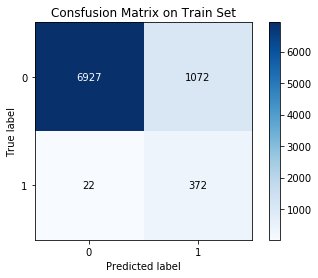

In [72]:
import scikitplot as skplt

# plot the comfusion matrix  in the train set 

skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False,title="Consfusion Matrix on Train Set")
plt.show() 

In [73]:
y_test_scores = clf_knn.decision_function(X_test)  # outlier scores

# Evaluate on the training data
evaluate_print('KNN', y_test,y_test_scores) 

KNN ROC:0.9393, precision @ rank n:0.5408


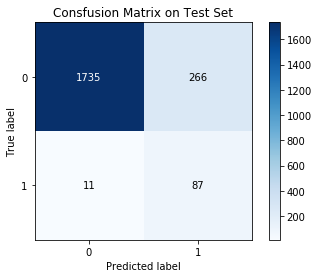

In [74]:
# plot the comfusion matrix  in the test set
y_preds = clf_knn.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test,y_preds, normalize=False,
                                    title="Consfusion Matrix on Test Set",
                                    )
plt.show() 

In [85]:
# create the Iforest model
clf_ocsvm = OCSVM(contamination= 0.172)

clf_ocsvm.fit(X_train)


OCSVM(cache_size=200, coef0=0.0, contamination=0.172, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [86]:
# Get the prediction labels of the training data
y_train_pred = clf_ocsvm.labels_  # binary labels (0: inliers, 1: outliers)

clf_name ='OCSVM'

# Outlier scores
y_train_scores = clf_ocsvm.decision_scores_ 
# Evaluate on the training data
evaluate_print(clf_name, y_train, y_train_scores) 

OCSVM ROC:0.9651, precision @ rank n:0.7132


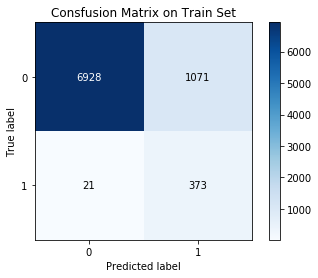

In [87]:

# plot the comfusion matrix  in the train set 

skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, 
                                    normalize=False,
                                    title="Consfusion Matrix on Train Set")
plt.show() 

In [88]:
y_test_scores = clf_ocsvm.decision_function(X_test)  # outlier scores

# Evaluate on the training data
evaluate_print(clf_name, y_test,y_test_scores) 

OCSVM ROC:0.9571, precision @ rank n:0.6633


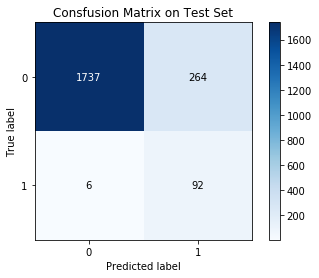

In [89]:
# plot the comfusion matrix  in the test set
y_preds = clf_ocsvm.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test,y_preds, normalize=False,
                                    title="Consfusion Matrix on Test Set",
                                    )
plt.show() 